In [1]:
import numpy as np
from scipy.stats import linregress
from scipy.optimize import minimize
import pandas as pd
import os
from collections import Counter
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
# These lines do some fancy plotting magics
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Homework 6 Written Answers:

1. Shown in code

2. Shown in code 

3. Shown with code

4. 
    The K that I chose was 4 because intuitively, this is the point at which the plot
    has the most elbow like pattern. 

    The four clusters could be clusters indicating groups of states that all voted 
    republican, democratic, the same as other states, or half and half. 

    Cluster 1: In this first cluster, most of the states look to be pretty split 
    in terms of how they vote. Roughly half and half voted for Democratic and Republican
    such as Florida, Arkansas and so on. 

    Cluster 2: The second cluster shows states that primarily voted Democratic (blue)
    during this time period such as Masachussetts and Delaware. 

    Cluster 3: This third cluster shows states that are primarily Republican (red)
    during this time period such as Texas, Utah, and so forth. 

    Cluster 4: This cluster appears to be states that started off as Republican (red)
    and then became primarily blue towards the latter years.

5. 


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

dataframes = []
for table in tables:
    rows = table.find_all('tr')
    headers = [header.text.strip() for header in rows[0].find_all('th')]
    data = []
    for row in rows[1:]:
        data.append([cell.text.strip() for cell in row.find_all('td')])
    df = pd.DataFrame(data)
    dataframes.append(df)

presid = dataframes[0]
presid = presid.drop(labels = [25, 52], axis= 0)
print(presid.shape)
presid.head(5)


(51, 59)


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,,,,,,,,,DR,Jackson,...,R,R,R,R,R,R,R,R,R,R
1,,,,,,,,,,,...,R,R,R,R,R,R,R,R,R,R
2,,,,,,,,,,,...,R,R,R,D,R,R,R,R,R,D
3,,,,,,,,,,,...,R,R,D,D,R,R,R,R,R,R
4,,,,,,,,,,,...,R,R,D,D,D,D,D,D,D,D


In [3]:
presid = presid.set_axis(["Alabama",
"Alaska",
"Arizona",
"Arkansas",
"California",
"Colorado",
"Connecticut",
"Delaware",
"D.C.",
"Florida",
"Georgia",
"Hawaii",
"Idaho",
"Illinois",
"Indiana",
"Iowa",
"Kansas",
"Kentucky",
"Louisiana",
"Maine",
"Maryland",
"Massachusetts",
"Michigan",
"Minnesota",
"Mississippi",
"Missouri",
"Montana",
"Nebraska",
"Nevada",
"New Hampshire",
"New Jersey",
"New Mexico",
"New York",
"North Carolina",
"North Dakota",
"Ohio",
"Oklahoma",
"Oregon",
"Pennsylvania",
"Rhode Island",
"South Carolina",
"South Dakota",
"Tennessee",
"Texas",
"Utah",
"Vermont",
"Virginia",
"Washington",
"West Virginia",
"Wisconsin",
"Wyoming"], axis= 0)
years = [1789, 1792]
for i in range(57):
    years.append(years[i + 1] + 4)
presid = presid.set_axis(years, axis=1)
final_pres = presid[years[-13:]]

In [4]:
# q2 cont. 
final_pres = final_pres.replace("R", 1)
final_pres = final_pres.replace("D", 0)
final_pres.shape


(51, 13)

In [5]:
#q3
rep_states = []
for index, row in final_pres.iterrows():
    if sum(row) == 13:
        rep_states.append(index)
print(f"These are the states that voted all Republican during this time period: \n{rep_states}")

These are the states that voted all Republican during this time period: 
['Alaska', 'Idaho', 'Kansas', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota', 'Utah', 'Wyoming']


In [6]:
dem_states = []
for index, row in final_pres.iterrows():
    if sum(row) == 0:
        dem_states.append(index)
print(f"These are the states that voted all Democratic during this time period: \n{dem_states}")

These are the states that voted all Democratic during this time period: 
['D.C.']


In [7]:
illi = final_pres.loc['Illinois']
same_il = final_pres.apply(lambda row: (row == illi).all(), axis=1)
print(f"These are the states with the same votes as Illinois: \n{same_il[same_il].index.tolist()}")

These are the states with the same votes as Illinois: 
['California', 'Connecticut', 'Illinois', 'Maine', 'New Jersey', 'Vermont']


These findings are quite interesting. As we can see more states voted all Republican
than states who voted for all Democratic over this time period. And 6 states 
voted the exact same amount of times of Republican as Illinois. These states 
can often vary and are considered swing and power states in the system. 

In [20]:
# q4
from sklearn.cluster import KMeans
K_range = range(1, 11)
total_wcv = []
for K in K_range:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(final_pres)
    wcv = kmeans.inertia_
    total_wcv.append(wcv)

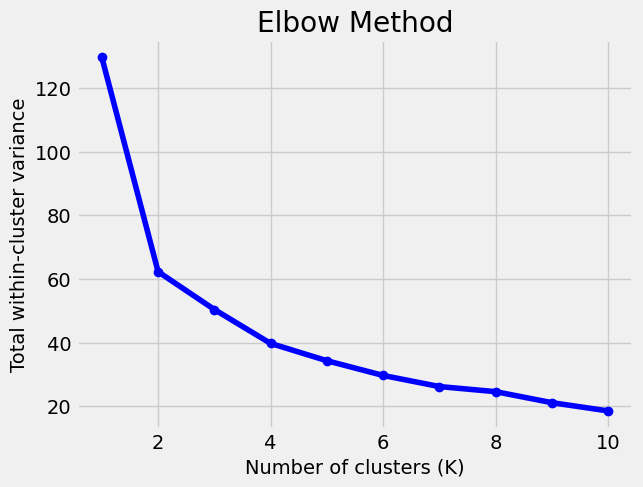

In [ ]:
plt.plot(K_range, total_wcv, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total within-cluster variance')
plt.title('Elbow Method')
plt.show()

Part 4:

The K that I chose was 4 because intuitively, this is the point at which the plot
has the most elbow like pattern. 

The four clusters could be clusters indicating groups of states that all voted 
republican, democratic, the same as other states, or half and half. 



In [27]:
# q5
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [34]:
final_pres = final_pres.drop(columns= ['Cluster'])
final_pres

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
Alabama,1,0,1,1,1,1,1,1,1,1,1,1,1
Alaska,1,1,1,1,1,1,1,1,1,1,1,1,1
Arizona,1,1,1,1,1,1,0,1,1,1,1,1,0
Arkansas,1,0,1,1,1,0,0,1,1,1,1,1,1
California,1,1,1,1,1,0,0,0,0,0,0,0,0
Colorado,1,1,1,1,1,0,1,1,1,0,0,0,0
Connecticut,1,1,1,1,1,0,0,0,0,0,0,0,0
Delaware,1,0,1,1,1,0,0,0,0,0,0,0,0
D.C.,0,0,0,0,0,0,0,0,0,0,0,0,0
Florida,1,0,1,1,1,1,0,1,1,0,0,1,1


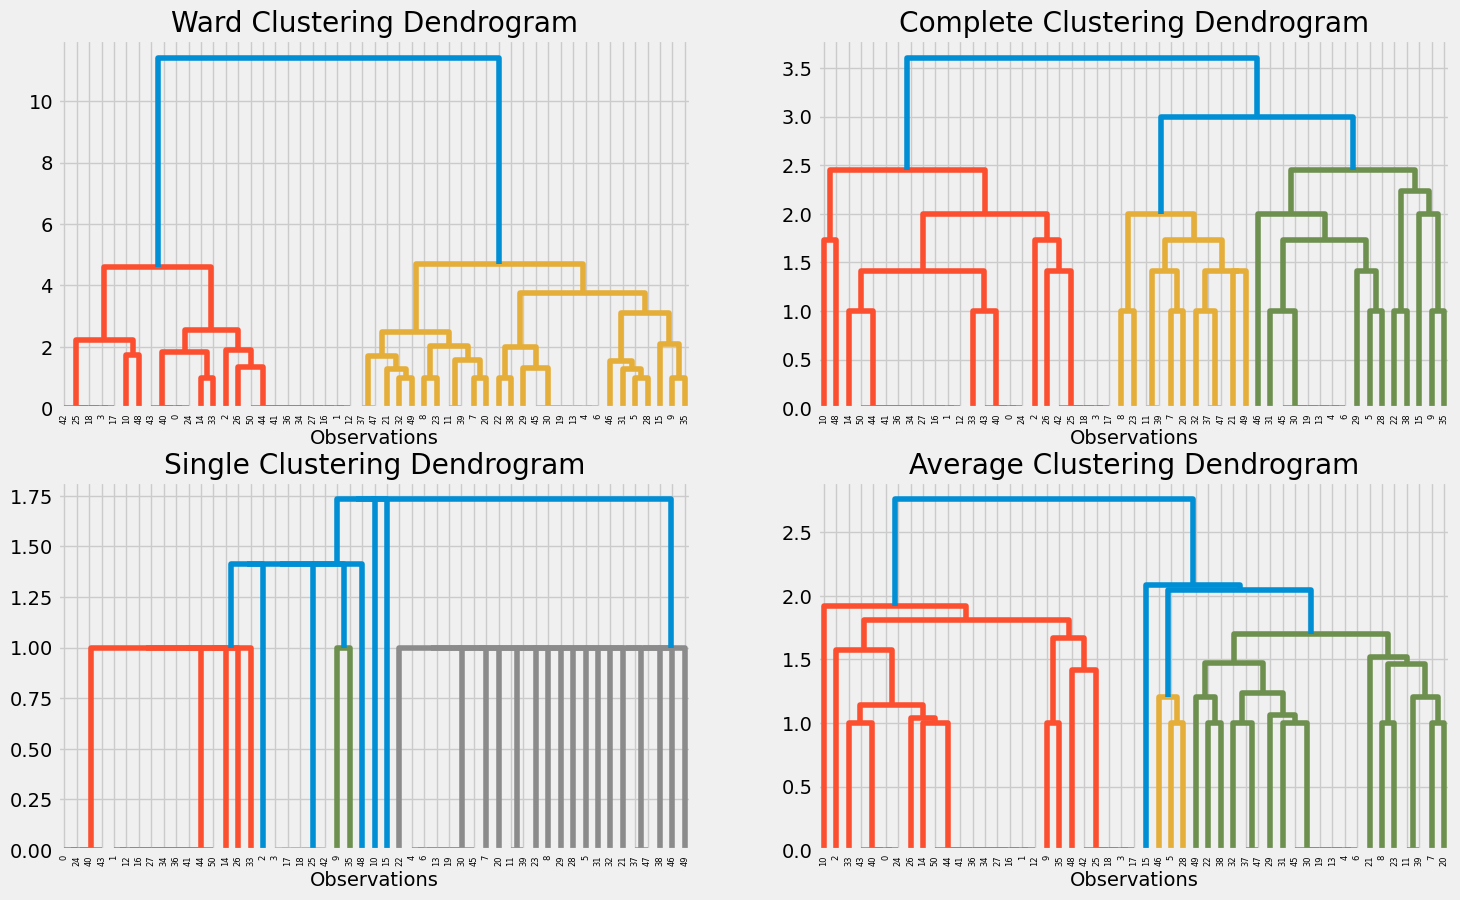

In [35]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
cluster_1 = AgglomerativeClustering(distance_threshold= 0, n_clusters=None, linkage='ward').fit(final_pres)
plt.title("Ward Clustering Dendrogram")
plot_dendrogram(cluster_1)
plt.xlabel("Observations")

plt.subplot(2, 2, 2)
cluster_2 = AgglomerativeClustering(distance_threshold= 0, n_clusters=None, linkage='complete').fit(final_pres)
plt.title("Complete Clustering Dendrogram")
plot_dendrogram(cluster_2)
plt.xlabel("Observations")

plt.subplot(2, 2, 3)
cluster_3 = AgglomerativeClustering(distance_threshold= 0, n_clusters=None, linkage='single').fit(final_pres)
plt.title("Single Clustering Dendrogram")
plot_dendrogram(cluster_3)
plt.xlabel("Observations")

plt.subplot(2, 2, 4)
cluster_4 = AgglomerativeClustering(distance_threshold= 0, n_clusters=None, linkage='average').fit(final_pres)
plt.title("Average Clustering Dendrogram")
plot_dendrogram(cluster_4)
plt.xlabel("Observations")


plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(final_pres)
n_final_pres = final_pres
n_final_pres['Cluster'] = clusters
n_final_pres

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,Cluster
Alabama,1,0,1,1,1,1,1,1,1,1,1,1,1,2
Alaska,1,1,1,1,1,1,1,1,1,1,1,1,1,2
Arizona,1,1,1,1,1,1,0,1,1,1,1,1,0,2
Arkansas,1,0,1,1,1,0,0,1,1,1,1,1,1,0
California,1,1,1,1,1,0,0,0,0,0,0,0,0,3
Colorado,1,1,1,1,1,0,1,1,1,0,0,0,0,3
Connecticut,1,1,1,1,1,0,0,0,0,0,0,0,0,3
Delaware,1,0,1,1,1,0,0,0,0,0,0,0,0,1
D.C.,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Florida,1,0,1,1,1,1,0,1,1,0,0,1,1,0


In [36]:
clust_1 = n_final_pres.groupby("Cluster").get_group(0)
clust_1

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,Cluster
Arkansas,1,0,1,1,1,0,0,1,1,1,1,1,1,0
Florida,1,0,1,1,1,1,0,1,1,0,0,1,1,0
Georgia,1,0,0,1,1,0,1,1,1,1,1,1,0,0
Kentucky,1,0,1,1,1,0,0,1,1,1,1,1,1,0
Louisiana,1,0,1,1,1,0,0,1,1,1,1,1,1,0
Missouri,1,0,1,1,1,0,0,1,1,1,1,1,1,0
Ohio,1,0,1,1,1,0,0,1,1,0,0,1,1,0
Tennessee,1,0,1,1,1,0,0,1,1,1,1,1,1,0
West Virginia,1,0,0,1,0,0,0,1,1,1,1,1,1,0


In [37]:
clust_2 = n_final_pres.groupby("Cluster").get_group(1)
clust_2

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,Cluster
Delaware,1,0,1,1,1,0,0,0,0,0,0,0,0,1
D.C.,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Hawaii,1,0,0,1,0,0,0,0,0,0,0,0,0,1
Maryland,1,0,0,1,1,0,0,0,0,0,0,0,0,1
Massachusetts,0,0,1,1,0,0,0,0,0,0,0,0,0,1
Minnesota,1,0,0,0,0,0,0,0,0,0,0,0,0,1
New York,1,0,1,1,0,0,0,0,0,0,0,0,0,1
Pennsylvania,1,0,1,1,1,0,0,0,0,0,0,1,0,1
Rhode Island,1,0,0,1,0,0,0,0,0,0,0,0,0,1
Wisconsin,1,0,1,1,0,0,0,0,0,0,0,1,0,1


In [38]:
clust_3 = n_final_pres.groupby("Cluster").get_group(2)
clust_3

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,Cluster
Alabama,1,0,1,1,1,1,1,1,1,1,1,1,1,2
Alaska,1,1,1,1,1,1,1,1,1,1,1,1,1,2
Arizona,1,1,1,1,1,1,0,1,1,1,1,1,0,2
Idaho,1,1,1,1,1,1,1,1,1,1,1,1,1,2
Indiana,1,1,1,1,1,1,1,1,1,0,1,1,1,2
Kansas,1,1,1,1,1,1,1,1,1,1,1,1,1,2
Mississippi,1,0,1,1,1,1,1,1,1,1,1,1,1,2
Montana,1,1,1,1,1,0,1,1,1,1,1,1,1,2
Nebraska,1,1,1,1,1,1,1,1,1,1,1,1,1,2
North Carolina,1,0,1,1,1,1,1,1,1,0,1,1,1,2


In [39]:
clust_4 = n_final_pres.groupby("Cluster").get_group(3)
clust_4

,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,Cluster
California,1,1,1,1,1,0,0,0,0,0,0,0,0,3
Colorado,1,1,1,1,1,0,1,1,1,0,0,0,0,3
Connecticut,1,1,1,1,1,0,0,0,0,0,0,0,0,3
Illinois,1,1,1,1,1,0,0,0,0,0,0,0,0,3
Iowa,1,1,1,1,0,0,0,0,1,0,0,1,1,3
Maine,1,1,1,1,1,0,0,0,0,0,0,0,0,3
Michigan,1,1,1,1,1,0,0,0,0,0,0,1,0,3
Nevada,1,1,1,1,1,0,0,1,1,0,0,0,0,3
New Hampshire,1,1,1,1,1,0,0,1,0,0,0,0,0,3
New Jersey,1,1,1,1,1,0,0,0,0,0,0,0,0,3
